<a href="https://colab.research.google.com/github/LaraV15/Programacion--II/blob/main/Trabajo%20_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🖥️ **TP - Progamación II - Grupo 14**

## 👥 **Integrantes:** 
### · García, Timoteo
### · Mangiante, Guillermo
### · Valeri, Lara

##**Comisión 2**


Utilizamos los siguientes datasets:



*   Estadísticas criminales en la República Argentina por Provincias: [snic-provincias.csv](https://https://datos.gob.ar/dataset/seguridad-estadisticas-criminales-republica-argentina-por-provincias-departamentos/archivo/seguridad_2.1)
*   Cantidad de Habitantes de las Provincias Argentinas según el censo del 2010: [Pobliación.csv](https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/Poblacion2)





---


# ➡️ ¿Cuál es la provincia más insegura del país? En relación a la cantidad de habitantes y de delitos ocurridos durante el período 2014 - 2021

Obtenida la provincia realizaremos un análisis profundo de ella, como por ejemplo, tipo de crímen más frecuente/ menos frecuente, crímenes con más victimas, año con más victimas.
Acompañando estos resultados con gráficos que representen la información.




---



# 1️⃣ Importamos los módulos que vamos a utilizar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2️⃣ Leemos los archivos que necesitamos

In [ ]:
#Si los datos están en en Drive, utilizar las siguientes líneas de código:
data = "/content/drive/MyDrive/TP Programación II/snic-provincias.csv"
pob = '/content/drive/MyDrive/TP Programación II/Poblacion.csv'

df = pd.read_csv(data)
poblacion = pd.read_csv(pob, delimiter=';')

In [ ]:
#Si los datos no están en drive y se cargan al Colab usar las siguientes líneas de código:
data="snic-provincias.csv"
pob = "Poblacion.csv"
df=pd.read_csv(data)
poblacion = pd.read_csv(pob, delimiter=';')

# 3️⃣ Exploramos y analizamos los archivos

**Comenzamos analizando y 
limpiando los datos del dataset**

In [ ]:
#Visualizamos las primeras 5 filas para ver con qué datos contamos

df.head()

,anio,provincia_id,provincia_nombre,codigo_delito_snic_id,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas
0,2014,2,Ciudad Autónoma de Buenos Aires,1,Homicidios dolosos,185,200.0
1,2014,2,Ciudad Autónoma de Buenos Aires,2,Homicidios dolosos en grado de tentativa,54,68.0
2,2014,2,Ciudad Autónoma de Buenos Aires,3,Muertes en Accidentes Viales,82,102.0
3,2014,2,Ciudad Autónoma de Buenos Aires,4,Homicidios culposos por otros hechos,23,24.0
4,2014,2,Ciudad Autónoma de Buenos Aires,5,Lesiones dolosas,18679,21175.0


In [ ]:
#Vemos cuantas filas y columnas tiene el dataset "sobre delitos"

df.shape

(8880, 7)

In [ ]:
#Le cambiamos el nombre a una de las columnas

df.rename(columns={'provincia_nombre': 'Provincia'}, inplace=True)
df.head()


,anio,provincia_id,Provincia,codigo_delito_snic_id,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas
0,2014,2,Ciudad Autónoma de Buenos Aires,1,Homicidios dolosos,185,200.0
1,2014,2,Ciudad Autónoma de Buenos Aires,2,Homicidios dolosos en grado de tentativa,54,68.0
2,2014,2,Ciudad Autónoma de Buenos Aires,3,Muertes en Accidentes Viales,82,102.0
3,2014,2,Ciudad Autónoma de Buenos Aires,4,Homicidios culposos por otros hechos,23,24.0
4,2014,2,Ciudad Autónoma de Buenos Aires,5,Lesiones dolosas,18679,21175.0


In [ ]:
# Ahora vemos qué datos hay en el archivo pobliacion

poblacion.head()

,Provincia,Estimada 2020
0,Buenos Aires,17.541.141
1,Catamarca,415.438
2,Chaco,1.204.541
3,Chubut,618.994
4,Ciudad Autónoma de Buenos Aires,3.075.646


In [ ]:
#Contramos las filas y columnas del archivo población

poblacion.shape

(24, 2)


Vamos a proceder a Merger los Dataframes, asi tenemos la poblacion en el mismo que tenemos los datos

In [ ]:
# Vamos a ver que columnas tiene cada dataset

print("Columnas del Dataframe de delitos por provincia:")
print(df.columns)
print()
print("Columnas del Dataframe de población:")
print(poblacion.columns)

Columnas del Dataframe de delitos por provincia:
Index(['anio', 'provincia_id', 'Provincia', 'codigo_delito_snic_id',
       'codigo_delito_snic_nombre', 'cantidad_hechos', 'cantidad_victimas'],
      dtype='object')

Columnas del Dataframe de población:
Index(['Provincia', 'Estimada 2020'], dtype='object')


# 4️⃣ Detección de nulos en cada DataFrame

Analizamos cuántos nulos tiene cada columna de cada DataFrame, primero comenzamos con delitos por provincia y luego población.

**Delitos por provincia**

In [ ]:
# Vemos si existen nulos

df.isnull().sum()

anio                            0
provincia_id                    0
Provincia                       0
codigo_delito_snic_id           0
codigo_delito_snic_nombre       0
cantidad_hechos                 0
cantidad_victimas            6288
dtype: int64

A partir de lo anterior podemos observar que las primeras 6 columnas no tienen ningún dato nulo, mientras que la última tiene muchos. Que la columna 'cantidad_victimas' tenga datos nulos no es incorrecto, ya que esto implica que hay algunos delitos que no contaron con victimas.

In [ ]:
#Cuánto representa del total

df.isnull().sum() / df.shape[0] * 100

anio                          0.000000
provincia_id                  0.000000
Provincia                     0.000000
codigo_delito_snic_id         0.000000
codigo_delito_snic_nombre     0.000000
cantidad_hechos               0.000000
cantidad_victimas            70.810811
dtype: float64

In [ ]:
# Reemplazamos los nulls de cantidad de victimas por 0

df.replace(to_replace=' ', value= np.NaN, inplace=True)
df.fillna(0, inplace=True)


In [ ]:
# Contralamos que sean 0

df.isnull().sum()

anio                         0
provincia_id                 0
Provincia                    0
codigo_delito_snic_id        0
codigo_delito_snic_nombre    0
cantidad_hechos              0
cantidad_victimas            0
dtype: int64

In [ ]:
#Convertimos los datos a enteros

df.cantidad_victimas.astype(int)

0         200
1          68
2         102
3          24
4       21175
        ...  
8875        0
8876        0
8877        0
8878       21
8879        0
Name: cantidad_victimas, Length: 8880, dtype: int64

**Población**

In [ ]:
# Vemos si existen nulos

poblacion.isnull().sum()

Provincia        0
Estimada 2020    0
dtype: int64

Era la respuesta esperada, ya que no hay ninguna pronvincia del país que no tenga habitantes

# 5️⃣ Comenzamos a realizar preguntas sobre nuestros datos

**A partir de observar que hay delitos que no tienen victimas, cabe preguntarnos. ¿Cuáles son los delitos que no cuentan con ninguna victima?**

In [ ]:
# ¿Que delitos no tienen victimas? - Generamos un filtro que nos permite seleccionar solamente los hechos que NO TIENE VICTIMAS

mask = np.logical_and(df['cantidad_hechos'] != 0,np.logical_or(df['cantidad_victimas'].isnull(), df['cantidad_victimas'] == 0))
vict=df[mask]
vict['codigo_delito_snic_nombre'].value_counts()

Otros delitos previstos en leyes especiales                                                     192
Robos (excluye los agravados por el resultado de lesiones y/o muertes)                          192
Hurtos                                                                                          192
Otros delitos contra la propiedad                                                               192
Delitos contra la administración pública                                                        192
Delitos contra la fe pública                                                                    192
Amenazas                                                                                        192
Tentativas de robo (excluye las agravadas por el res. de lesiones y/o muerte)                   190
Tentativas de hurto                                                                             188
Delitos contra el orden público                                                                 181


**¿Todas las provincias tienen la misma cantidad de datos?**

In [ ]:
# ¿Todas las provincias tienen la misma cantidad de datos?

df['Provincia'].value_counts()

Ciudad Autónoma de Buenos Aires                          370
Buenos Aires                                             370
Tucumán                                                  370
Santiago del Estero                                      370
Santa Fe                                                 370
Santa Cruz                                               370
San Luis                                                 370
San Juan                                                 370
Salta                                                    370
Río Negro                                                370
Neuquén                                                  370
Misiones                                                 370
Mendoza                                                  370
La Rioja                                                 370
La Pampa                                                 370
Jujuy                                                    370
Formosa                 

**¿Qué año hubo más crímenes?**

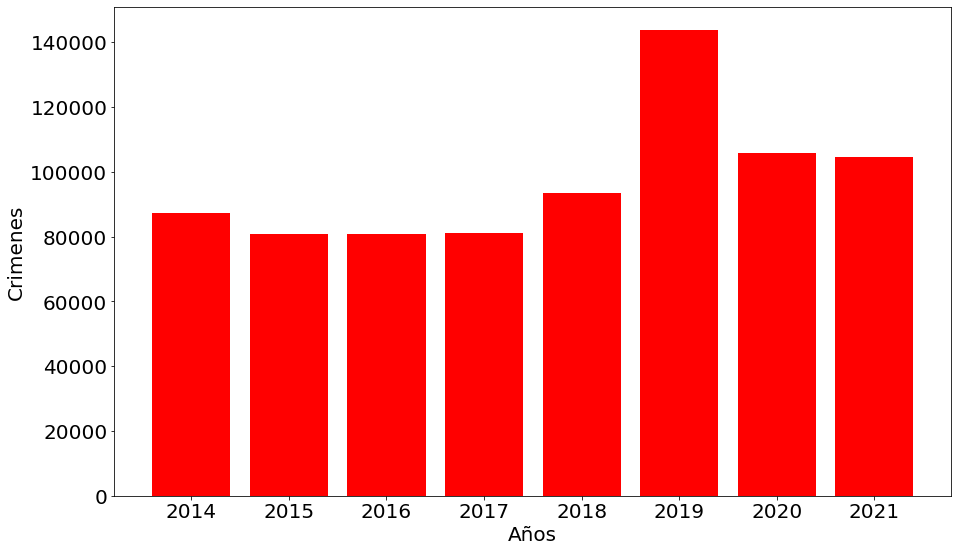

In [ ]:
# ¿Que año hubo mas crimenes?"

plt.figure(figsize=(15,9))
ax = plt.bar(df['anio'], df['cantidad_hechos'],color= "red")
plt.xlabel("Años", fontsize = 20)
plt.ylabel("Crimenes", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
# Creamos un DataFrame ordenado por cantidad de hechos

data_ordenada = df.sort_values(by = 'cantidad_hechos',ascending = False)


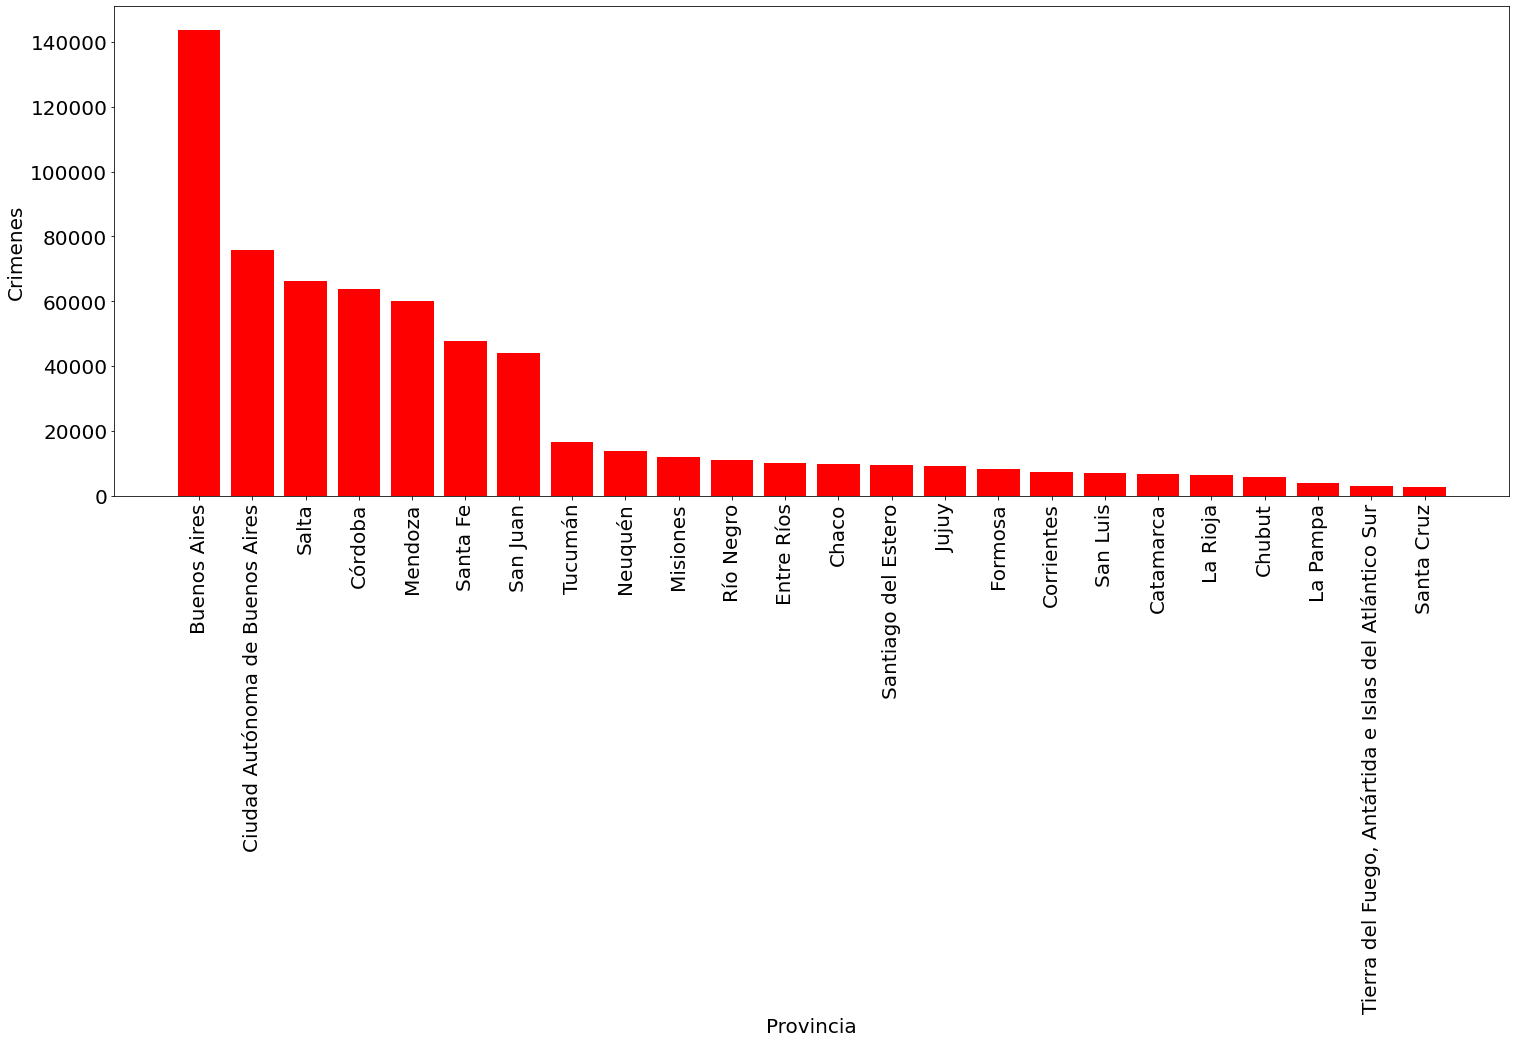

In [ ]:
# ¿En que provincia hubo mas crimenes?

plt.figure(figsize=(25,9))
ax = plt.bar(data_ordenada['Provincia'],data_ordenada['cantidad_hechos'],color= "red")
plt.xlabel("Provincia",fontsize = 20)
plt.ylabel("Crimenes", fontsize = 20)
plt.xticks(fontsize = 20,rotation=90)
plt.yticks(fontsize = 20)
plt.show()

# 6️⃣ Combinamos los DataFrame

In [ ]:
data_ordenada[['Provincia', 'cantidad_hechos']].head()

,Provincia,cantidad_hechos
4920,Buenos Aires,143840
6264,Buenos Aires,105756
7608,Buenos Aires,104520
4924,Buenos Aires,98805
3576,Buenos Aires,93590


In [ ]:
# Nos quedamos solamente con la provincia y la cantidad de hechos en cada año

hechos_por_prov= pd.DataFrame(data_ordenada[['Provincia', 'cantidad_hechos']])
hechos_por_prov.head()


,Provincia,cantidad_hechos
4920,Buenos Aires,143840
6264,Buenos Aires,105756
7608,Buenos Aires,104520
4924,Buenos Aires,98805
3576,Buenos Aires,93590


In [ ]:
# Agrupamos las distintas cantidades de hechos por año en relación a cada pronvicia

df_group= hechos_por_prov.groupby('Provincia').sum()
df_group.head()

,cantidad_hechos
Provincia,
Buenos Aires,3554801
Catamarca,204378
Chaco,241477
Chubut,177390
Ciudad Autónoma de Buenos Aires,1488644


In [ ]:
poblacion.head()

,Provincia,Estimada 2020
0,Buenos Aires,17.541.141
1,Catamarca,415.438
2,Chaco,1.204.541
3,Chubut,618.994
4,Ciudad Autónoma de Buenos Aires,3.075.646


In [ ]:
# Combinamos los DataFrame

result = pd.merge(df_group, poblacion, on='Provincia')
result.rename(columns={'Estimada 2020': 'Poblacion'}, inplace=True)

result['Poblacion']=result['Poblacion'].str.replace('.', '').astype(int)

result.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Provincia        24 non-null     object
 1   cantidad_hechos  24 non-null     int64 
 2   Poblacion        24 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 768.0+ bytes


<ipython-input-119-8eba9cbaaa52>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  result['Poblacion']=result['Poblacion'].str.replace('.', '').astype(int)


In [ ]:
# Vemos la relación que existe entre la cantidad de hechos y la población

result['indicador'] = result.apply(lambda x: x['cantidad_hechos'] / x['Poblacion'], axis = 1)
result

,Provincia,cantidad_hechos,Poblacion,indicador
0,Buenos Aires,3554801,17541141,0.202655
1,Catamarca,204378,415438,0.491958
2,Chaco,241477,1204541,0.200472
3,Chubut,177390,618994,0.286578
4,Ciudad Autónoma de Buenos Aires,1488644,3075646,0.484010
5,Corrientes,179430,1120801,0.160091
6,Córdoba,1437623,3760450,0.382301
7,Entre Ríos,377315,1385961,0.272241
8,Formosa,182334,605193,0.301282
9,Jujuy,213122,770881,0.276465


In [ ]:
# Ordenamos el DataFrame

result.sort_values(by='indicador', ascending=False, inplace=True)

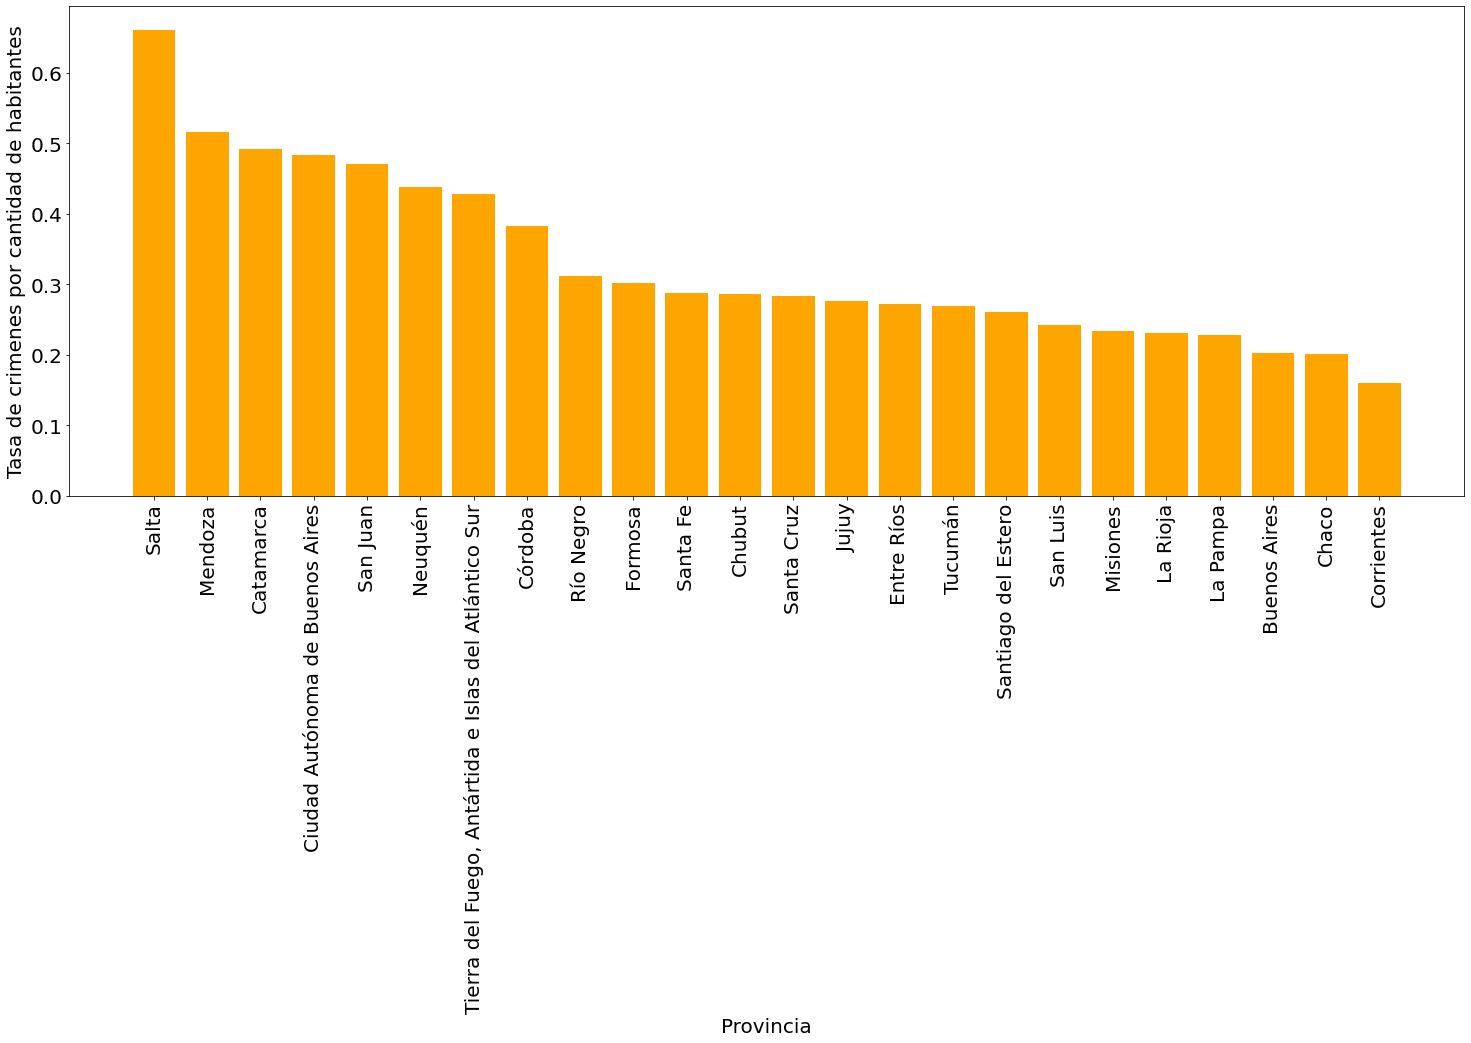

In [ ]:
# Gráficamos la relación entre la cantidad de hechos y la población para visualizar las peores pronvicias

plt.figure(figsize=(25,9))
ax = plt.bar(result['Provincia'],result['indicador'],color= "orange")
plt.xlabel("Provincia",fontsize = 20)
plt.ylabel("Tasa de crimenes por cantidad de habitantes", fontsize = 20)
plt.xticks(fontsize = 20,rotation=90)
plt.yticks(fontsize = 20)
plt.show()

# 7️⃣ Análisis sobre la Provincia de Buenos Aires

Sabemos que 2019 fue el año con mas crimenes y Buenos Aires es la provincia con mas crimines en nuestro dataset. **Veamosque tipo de crimenes son mas comunes en Bs.As.**

In [ ]:
# Generamos un filtro que nos permite seleccionar solamente la pronvincia de Bs. As. y el año 2019

#Primero definimos la máscara
mask_bsas = np.logical_and(df['anio'] == 2019, df['Provincia'] == 'Buenos Aires') #se queda con los datos cuyo año es 2019 y la Prov es Bs. As
#La asignamos a 'bsas'
bsas = df[mask_bsas]
#Ordenamos los datos en forma descendente
bsas.sort_values(by='cantidad_hechos', ascending=False, inplace=True)
#creamos una lista con los nombres de los delitos para utilizar para mostrar los datos
Lista_delitos=bsas['codigo_delito_snic_nombre'].to_list()


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
# Convertir cada elemento de la lista en una cadena
lista_delitos_str = [str(x) for x in Lista_delitos[:10]]

# Unir las cadenas en una sola separada por comas
delitos_str = ',\n'.join(lista_delitos_str)

# Imprimir la cadena resultante
print(f'Los 10 delitos mas usuales en 2019 para Buenos Aires fueron los siguientes:\n{delitos_str}')

Los 10 delitos mas usuales en 2019 para Buenos Aires fueron los siguientes:
Robos (excluye los agravados por el resultado de lesiones y/o muertes),
Hurtos,
Amenazas,
Lesiones culposas en Accidentes Viales,
Tenencia simple atenuada para uso personal de estupefacientes,
Lesiones dolosas,
Otros delitos contra la propiedad,
Otros delitos contra la seguridad pública,
Delitos contra la administración pública,
Tentativas de robo (excluye las agravadas por el res. de lesiones y/o muerte)


In [ ]:
# ¿Y la cantidad de victimas que hubo en 2019 en Provincia de Buenos Aires?

victimas = bsas['cantidad_victimas'].sum()

print(f"La cantidad de victimas de la Provincia de Buenos Aires en 2019 fue: {int(victimas)}")

La cantidad de victimas de la Provincia de Buenos Aires en 2019 fue: 100105


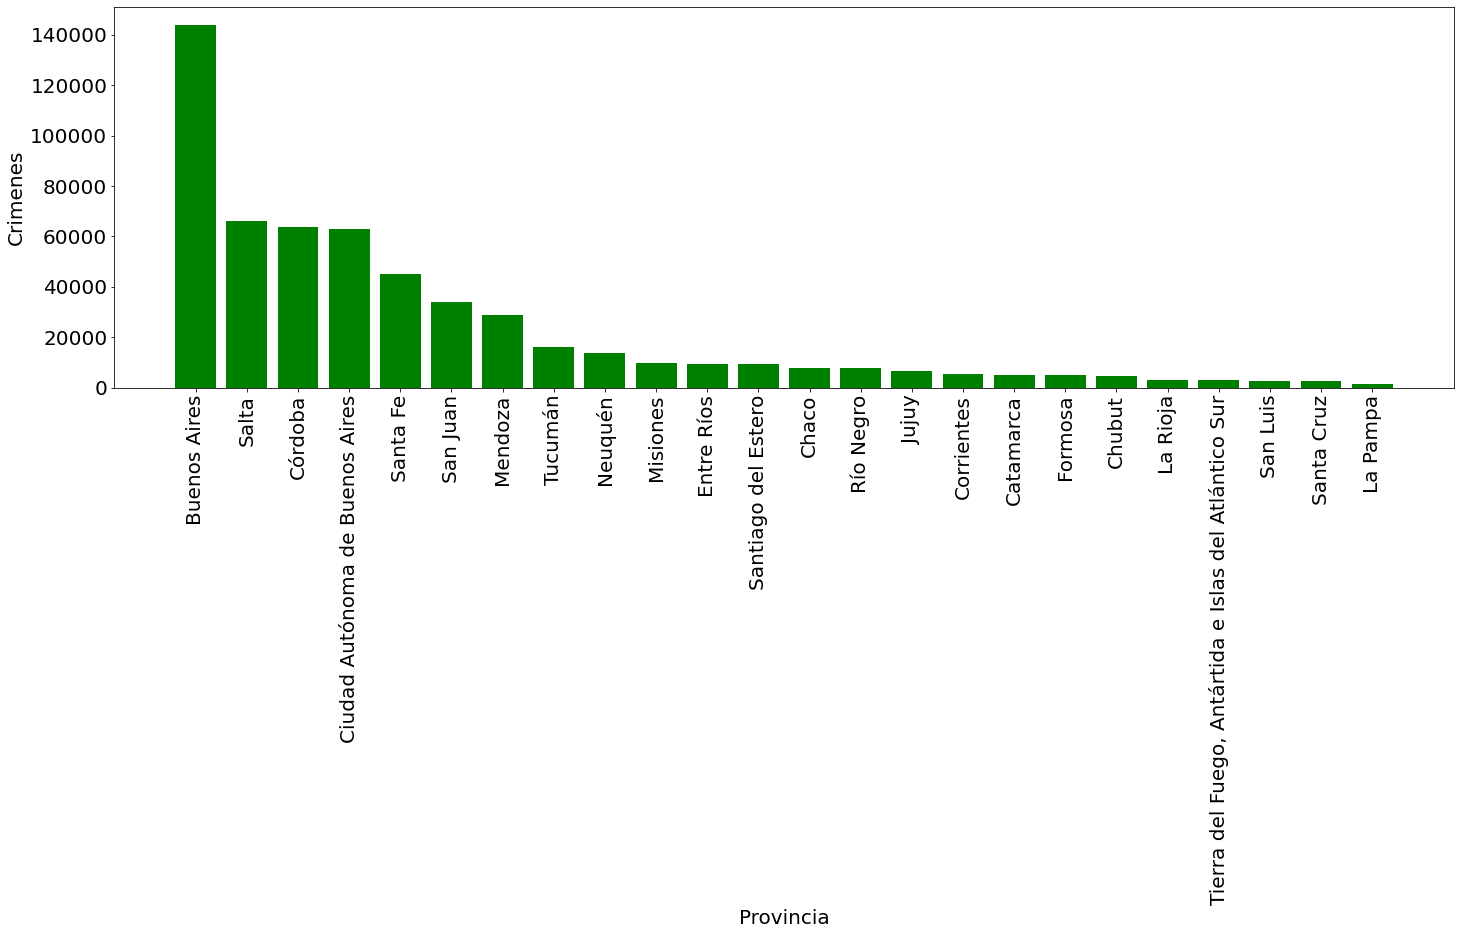

In [ ]:
# ¿Y con respecto a las otras provincias en 2019?. ¿Que fue el año que mas delitos hubo en Argentina?

mask_provincias = data_ordenada['anio'] == 2019
provincias = data_ordenada[mask_provincias]
plt.figure(figsize=(24,7))
ax = plt.bar(provincias['Provincia'],provincias['cantidad_hechos'],color= "green")
plt.xlabel("Provincia",fontsize = 20)
plt.ylabel("Crimenes", fontsize = 20)
plt.xticks(fontsize = 20,rotation=90)
plt.yticks(fontsize = 20)
plt.show()


# 8️⃣ Aplicar segmentación

In [ ]:
df.groupby(['anio', 'Provincia','codigo_delito_snic_nombre']).size()

anio  Provincia     codigo_delito_snic_nombre                                                    
2014  Buenos Aires  Amenazas                                                                         1
                    Delitos contra el estado civil                                                   1
                    Delitos contra el honor                                                          1
                    Delitos contra el orden público                                                  1
                    Delitos contra la administración pública                                         1
                                                                                                    ..
2021  Tucumán       Tentativas de robo (excluye las agravadas por el res. de lesiones y/o muerte)    1
                    Tentativas de robo agravado por el resultado de lesiones y/o muertes             1
                    Trata de personas agravado                                

In [ ]:
df.groupby(['anio', 'Provincia','codigo_delito_snic_nombre'])[['cantidad_hechos','cantidad_victimas']].sum()

cantidad_hechos  \
anio Provincia    codigo_delito_snic_nombre                                             
2014 Buenos Aires Amenazas                                                      58769   
                  Delitos contra el estado civil                                    1   
                  Delitos contra el honor                                          49   
                  Delitos contra el orden público                               13419   
                  Delitos contra la administración pública                       7687   
...                                                                               ...   
2021 Tucumán      Tentativas de robo (excluye las agravadas por e...              939   
                  Tentativas de robo agravado por el resultado de...               17   
                  Trata de personas agravado                                        0   
                  Trata de personas simple                                          1   
                  Violaciones                                                     263   

                                                                      cantidad_victimas  
anio Provincia    codigo_delito_snic_nombre                                              
2014 Buenos Aires Amenazas                                                          0.0  
                  Delitos contra el estado civil                                    0.0  
                  Delitos contra el honor                                          55.0  
                  Delitos contra el orden público                                   0.0  
                  Delitos contra la administración pública                          0.0  
...                                                                                 ...  
2021 Tucumán      Tentativas de robo (excluye las agravadas por e...                0.0  
                  Tentativas de robo agravado por el resultado de...                0.0  
                  Trata de personas agravado                                        0.0  
                  Trata de personas simple                                          1.0  
                  Violaciones                                                     264.0  

[8880 rows x 2 columns]

Agrupar los crimes por una escala de valor por peligrosidad.

Segmentar los crimenes


In [ ]:
#Función para deteminar el "nivel de peligrosidad"


def nivel_crimen(gr):  
  if gr['cantidad_victimas'] == 0:
    return 'Bajo'
  elif gr['cantidad_victimas'] < 15:
    return 'Medio'
  else:
    return 'Alto'


In [ ]:
df['cantidad_victimas'].fillna(0, inplace = True)

In [ ]:
#Creamos una nueva columna con contiene los "niveles de peligrosidad"

df['nivel_crimen'] = df.apply(nivel_crimen, axis = 1)

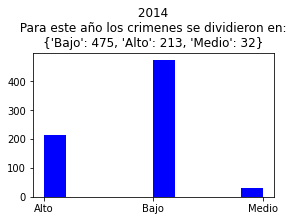

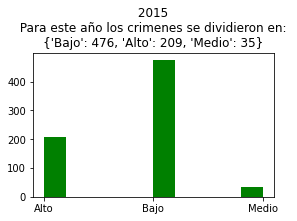

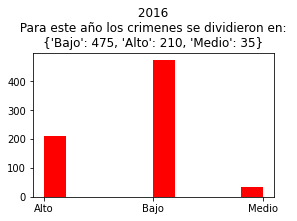

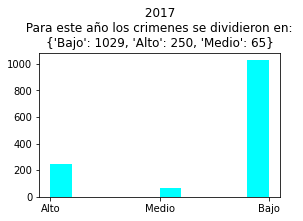

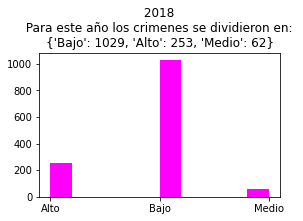

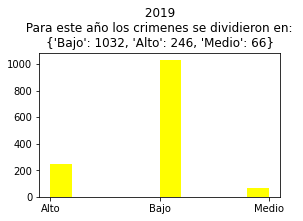

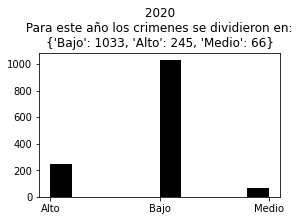

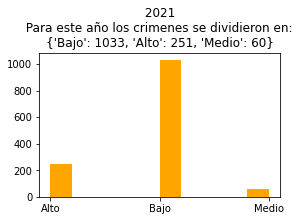

In [ ]:
#Graficamos como se dividieron los crimenes para todos los años

colores = ['blue','green','red','cyan','magenta','yellow','black', 'orange']
año = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
for x in range(0,8):
    plt.figure(figsize=(25,9))
    mask = df['anio'] == año[x]
    df_temp = df[mask] 
    ax = plt.subplot(3,5,x + 1)
    ax.hist(df_temp['nivel_crimen'],color= colores[x])
    valores = df_temp['nivel_crimen'].value_counts().to_dict()
    plt.title(f' {str(año[x])} \n Para este año los crimenes se dividieron en: \n{valores}')
    plt.show()


#Conclusiones

* La provincia con mayor cantidad de crimenes es **Buenos Aires**.
* En relación a la cantidad de habitantes, la provincia con más crimenes es **Salta**. Mientras que Buenos Aires esta cuarta.
* El año 2019 fue el año con mayor cantidad de crimenes. 




